# **Object Recognition**

---



## **Using SVM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import cifar10

### **Loading and Preprocessing CIFAR-10 Dataset**

---

Loads the CIFAR-10 dataset into training and testing sets and flatten the labels,  converts them into 1D arrays, which are easier to use with sklearn classifiers.

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten labels (Convert from shape (n,1) to (n,))
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Train Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)


### **Normalizing and Flattening Image Data**

---

Normalizes pixel values from the range (0-255) to (0-1) for better numerical stability.

In [ ]:
# Normalize pixel values (0-255) to (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images into 1D vectors (Flattening)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("New Shape:", x_train_flat.shape)


New Shape: (50000, 3072)


### **Training and Predicting with SVM**

---

Defines a SVM classifier. Trains the model on the flattened CIFAR-10 dataset and predicts labels for the test set.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Reduce dimensions to 100 components
pca = PCA(n_components=min(100, x_train.shape[1]))
# Ensures valid number of components

x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=1.0)
svm.fit(x_train_pca, y_train)


SVC()

In [ ]:
# Compute Accuracy
y_pred = svm.predict(x_test_pca)
accuracy1 = accuracy_score(y_test, y_pred) * 100
print(f"SVM Accuracy: {accuracy1:.2f}%")

SVM Accuracy: 51.50%


In [ ]:
c_values=[0.001,0.01,1.10]
acc=[]
for c in c_values:
  svm = SVC(kernel='rbf', C=c)
  svm.fit(x_train_pca, y_train)
  y_pred = svm.predict(x_test_pca)
  accuracy = accuracy_score(y_test, y_pred) * 100
  acc=np.append(acc,accuracy)



In [ ]:
c_values=c_values[:-1]

[31.22 36.51 51.5  51.5 ]


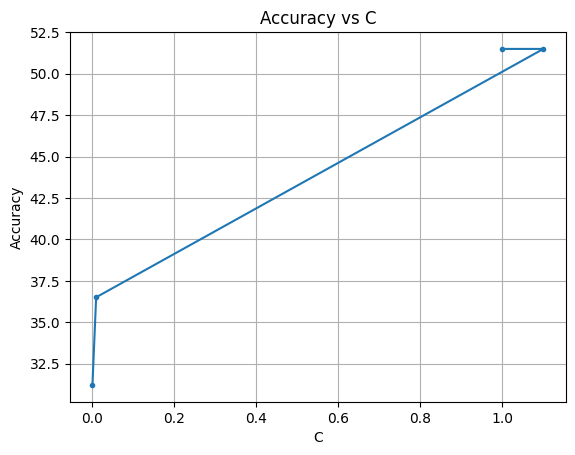

In [ ]:
print(acc)
plt.plot(c_values,acc, '.-')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C')
plt.grid(True)
plt.show()

### **Class-wise Accuracy**

---



The classification report shows precision, recall, and F1-score for each class, helping identify which categories the model struggles with the most.

* High precision = fewer false positives
* High recall = fewer false negatives
* Higher F1-score = better overall performance (balance between precision and recall)

In [ ]:
from sklearn.metrics import classification_report

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Print class-wise accuracy
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    Airplane       0.58      0.59      0.59      1000
  Automobile       0.62      0.62      0.62      1000
        Bird       0.39      0.36      0.38      1000
         Cat       0.36      0.34      0.35      1000
        Deer       0.43      0.40      0.42      1000
         Dog       0.48      0.42      0.45      1000
        Frog       0.49      0.61      0.54      1000
       Horse       0.60      0.53      0.57      1000
        Ship       0.61      0.68      0.64      1000
       Truck       0.57      0.59      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.52      0.51     10000



### **Visualizing SVM Predictions on CIFAR-10**

---



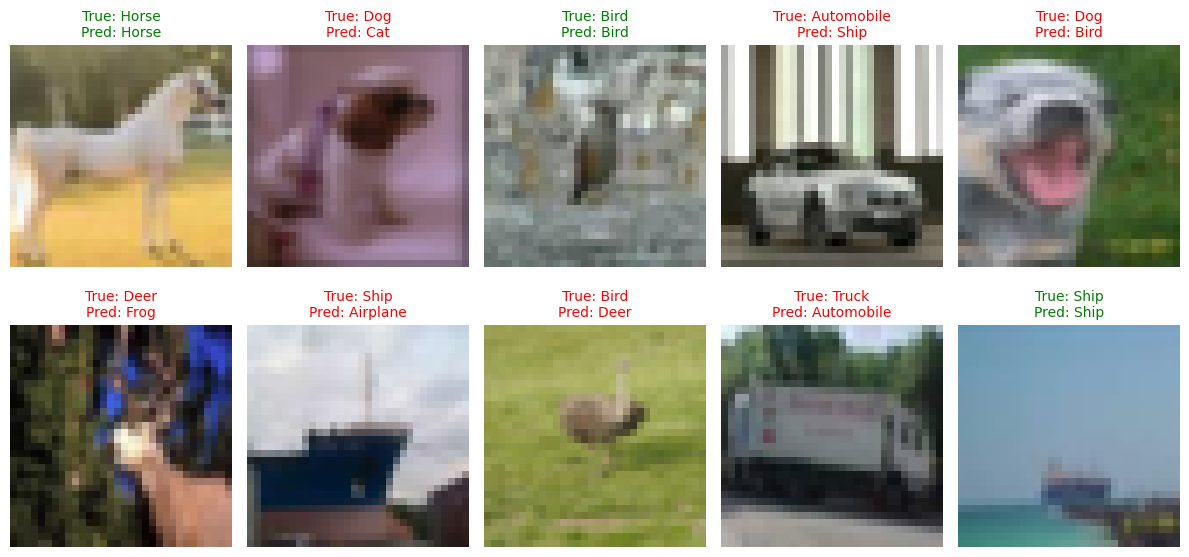

In [ ]:
# CIFAR-10 class labels

# Select random test images
num_images = 10  # Number of images to display
indices = np.random.choice(len(x_test), num_images, replace=False)  # Random indices
selected_images = x_test[indices]
true_labels = y_test[indices]
predicted_labels = y_pred[indices]

# Plot the images with predictions
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # Create a 2-row, 5-column subplot
    plt.imshow(selected_images[i])  # Show the image
    plt.axis('off')  # Hide axes
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}",
              fontsize=10, color="green" if true_labels[i] == predicted_labels[i] else "red")

plt.tight_layout()
plt.show()

### **Confusion Matrix**

---

Showing misclassified classes.

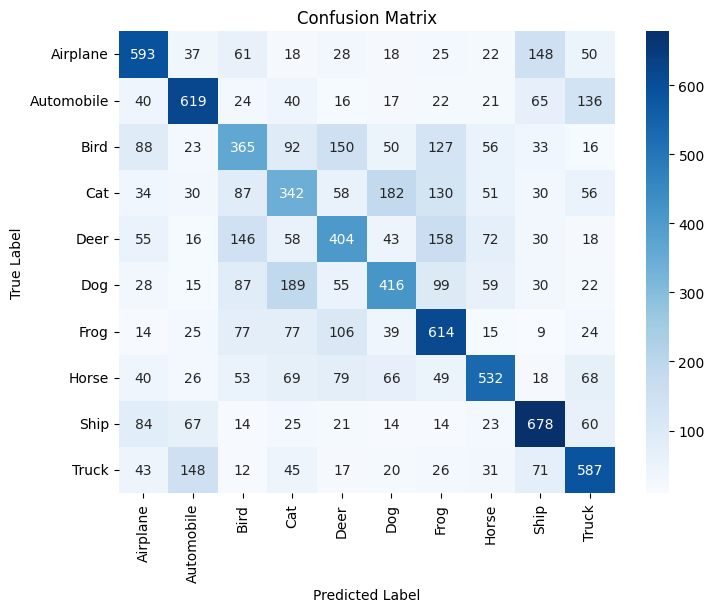

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM Accuracy: {accuracy:.2f}%")

SVM Accuracy: 51.50%


### **Why is the Accuracy Low?**
* Low-level pixel features – Raw CIFAR-10 images (32×32) don’t provide enough discriminative info for SVM.

* High inter-class similarity – Classes like "cat" vs "dog" look visually similar at low resolution.



